In [ ]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/forex/GBP_USD Historical Data ws sort.csv')
dataset.head()

,Date,Price,Open,High,Low,Change %
0,20-Dec-10,1.5511,1.5505,1.5577,1.5476,-0.15%
1,21-Dec-10,1.5465,1.5509,1.5568,1.5436,-0.30%
2,22-Dec-10,1.5387,1.5471,1.5495,1.5356,-0.50%
3,23-Dec-10,1.5428,1.5385,1.5439,1.5373,0.27%
4,24-Dec-10,1.5444,1.5431,1.5478,1.5417,0.10%


In [ ]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
ind_dataset = dataset.set_index(["Date"], drop=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633 entries, 0 to 2632
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2633 non-null   object 
 1   Price     2633 non-null   float64
 2   Open      2633 non-null   float64
 3   High      2633 non-null   float64
 4   Low       2633 non-null   float64
 5   Change %  2633 non-null   object 
dtypes: float64(4), object(2)
memory usage: 123.5+ KB


In [ ]:
dataset['Date'].describe()

count          2633
unique         2633
top       15-Apr-15
freq              1
Name: Date, dtype: object

In [ ]:
dataset['Date'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    2633
unique                   2633
top       2016-11-14 00:00:00
freq                        1
first     2010-12-20 00:00:00
last      2021-01-20 00:00:00
Name: Date, dtype: object

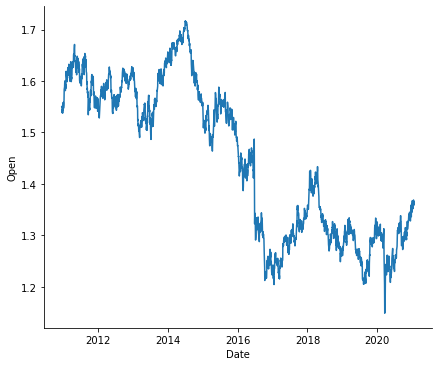

In [ ]:
sns.relplot(data=dataset, kind='line',
            x='Date', y='Open',  aspect=6/5)
plt.show()

In [ ]:
daily_data = dataset[['Date', 'Open']].rename(
    columns={'Date': 'ds',
             'Open': 'y'})

daily_data.head()

,ds,y
0,2010-12-20,1.5505
1,2010-12-21,1.5509
2,2010-12-22,1.5471
3,2010-12-23,1.5385
4,2010-12-24,1.5431


# Fitting

In [ ]:
from fbprophet import Prophet
model_dialy = Prophet()
model_dialy.fit(daily_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dialy = model_dialy.make_future_dataframe(periods=365, freq='D')
future_dialy.tail()

,ds
2993,2022-01-16
2994,2022-01-17
2995,2022-01-18
2996,2022-01-19
2997,2022-01-20


In [ ]:
forecast_dialy = model_dialy.predict(future_dialy)
forecast_dialy[['ds', 'trend', 'weekly', 'yearly', 'yhat']]

,ds,trend,weekly,yearly,yhat
0,2010-12-20,1.552570,0.002595,0.011312,1.566476
1,2010-12-21,1.553230,0.002578,0.010799,1.566607
2,2010-12-22,1.553889,0.002681,0.010254,1.566824
3,2010-12-23,1.554549,0.003026,0.009689,1.567264
4,2010-12-24,1.555209,0.003320,0.009117,1.567646
...,...,...,...,...,...
2993,2022-01-16,1.313889,-0.007100,0.009168,1.315958
2994,2022-01-17,1.313937,0.002595,0.009587,1.326118
2995,2022-01-18,1.313985,0.002578,0.009993,1.326556
2996,2022-01-19,1.314033,0.002681,0.010384,1.327097


In [ ]:
forecast_dialy['trend'] + forecast_dialy['weekly'] + forecast_dialy['yearly']

0       1.566476
1       1.566607
2       1.566824
3       1.567264
4       1.567646
          ...   
2993    1.315958
2994    1.326118
2995    1.326556
2996    1.327097
2997    1.327863
Length: 2998, dtype: float64

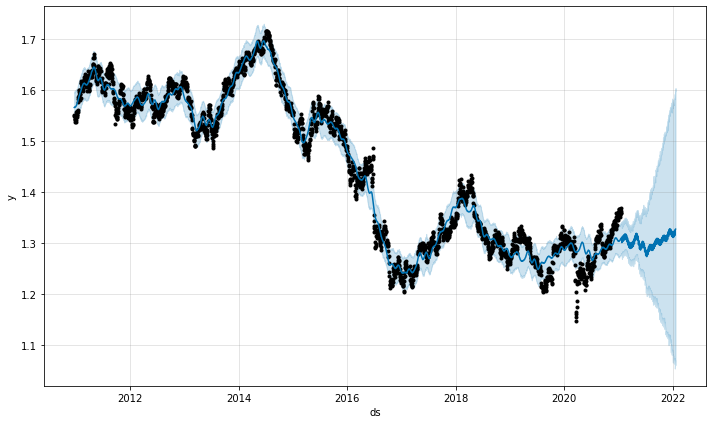

In [ ]:
fig = model_dialy.plot(forecast_dialy)

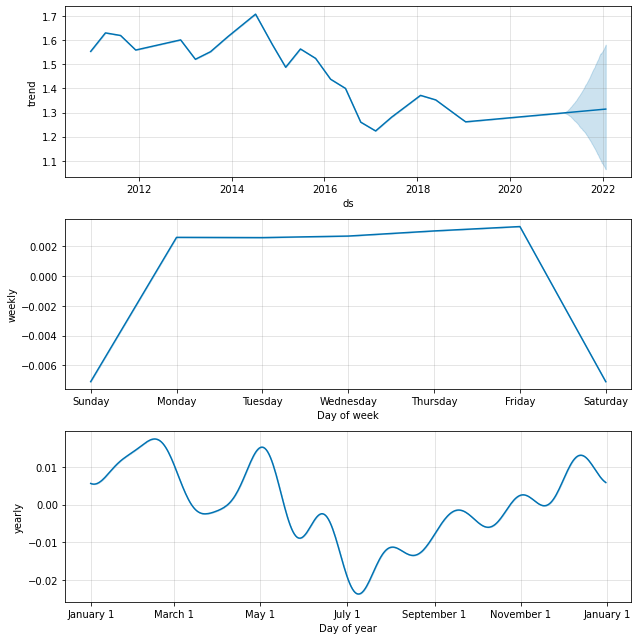

In [ ]:
fig = model_dialy.plot_components(forecast_dialy)

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_dialy, forecast_dialy)

In [ ]:
plot_components_plotly(model_dialy, forecast_dialy)

#Tuning

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


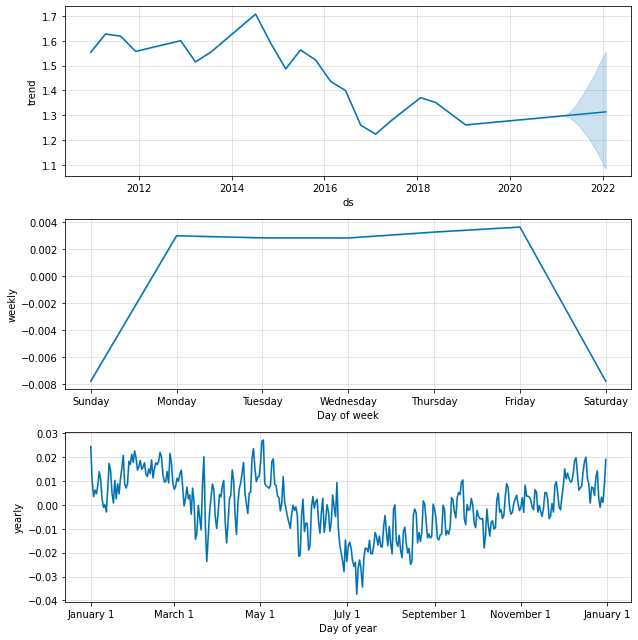

In [ ]:
# fitting model
model_tuning_seasonality = Prophet(
    weekly_seasonality=3, # default = 3
    yearly_seasonality=200 # default = 10
    )
model_tuning_seasonality.fit(daily_data)

# forecasting
future = model_tuning_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_seasonality.predict(future)

# visualize
fig = model_tuning_seasonality.plot_components(forecast)

In [ ]:
forecast_dialy.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-20,1.552570,1.535645,1.596103,1.552570,1.552570,0.013907,0.013907,0.013907,0.002595,0.002595,0.002595,0.011312,0.011312,0.011312,0.0,0.0,0.0,1.566476
1,2010-12-21,1.553230,1.535881,1.596879,1.553230,1.553230,0.013377,0.013377,0.013377,0.002578,0.002578,0.002578,0.010799,0.010799,0.010799,0.0,0.0,0.0,1.566607
2,2010-12-22,1.553889,1.536056,1.595560,1.553889,1.553889,0.012935,0.012935,0.012935,0.002681,0.002681,0.002681,0.010254,0.010254,0.010254,0.0,0.0,0.0,1.566824
3,2010-12-23,1.554549,1.534774,1.599399,1.554549,1.554549,0.012714,0.012714,0.012714,0.003026,0.003026,0.003026,0.009689,0.009689,0.009689,0.0,0.0,0.0,1.567264
4,2010-12-24,1.555209,1.536572,1.596652,1.555209,1.555209,0.012437,0.012437,0.012437,0.003320,0.003320,0.003320,0.009117,0.009117,0.009117,0.0,0.0,0.0,1.567646


In [ ]:
filename = '/content/drive/MyDrive/dataset/forex/output GBPUSD.csv'
forecast_dialy.to_csv(filename, index=False)